# Data Storytelling

## Imports

In [1]:
import kagglehub

import pandas as pd
import numpy as np

# Data visualization

from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Sci-kit learn

from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


## Load Data

In [2]:
# Download data from Kaggle

path = kagglehub.dataset_download("wenruliu/adult-income-dataset")

print(path)

/home/arsen/.cache/kagglehub/datasets/wenruliu/adult-income-dataset/versions/2


In [3]:
# Load data

income_df = pd.read_csv(path+'/adult.csv')

income_df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

## Data Description

- **Age** - Age of individuals
- **Workclass** - Employment status of individual
- **Education** - Highest level of education achieved by an individual
- **Educational-Num** - Highest level of education in numerical form
- **Marital-Status** - Marital status of individual
- **Occupation** - General type of occupation of individual
- **Relationship** - Represents what this individual is relative to others
- **Race** - Descriptions of individual's race
- **Gender** - Gender of individual
- **Capital-Gain** - Capital gains for an individual
- **Capital-Loss** - Capital loss for an individual
- **Hours-per-Week** - Hours an individual has reported to work per week
- **Native-Country** - Country of origin for an individual
- **Income** - Income group of individual

# Initial Analysis and Cleaning

In [4]:
income_df.describe()

age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

In [5]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Check for missing values

Some of the columns use `?` to represent missing values. If this is the case, they will be dropped.

### `workclass`

In [6]:
income_df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [7]:
# Drop missing values

income_df['workclass'] = income_df['workclass'].replace(to_replace='?', value=np.NaN)
income_df = income_df.dropna(subset='workclass')

# Verify result
income_df['workclass'].isna().sum()

0

In [8]:
income_df['workclass'].unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

### `education`

In [9]:
income_df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

Strange that some people listed `Preschool`, but otherwise no missing values.

### `marital-status`

In [10]:
income_df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

### `occupation`

In [11]:
income_df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces', '?'],
      dtype=object)

In [12]:
# Drop null values

income_df['occupation'] = income_df['occupation'].replace(to_replace='?', value=np.NaN)
income_df = income_df.dropna(subset='occupation')

# Verify

income_df['occupation'].isna().sum()

0

In [13]:
income_df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

### `relationship`

In [14]:
income_df['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

### `race`

In [15]:
income_df['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

### `gender`

In [16]:
income_df['gender'].unique()

array(['Male', 'Female'], dtype=object)

### `native-country`

In [17]:
income_df['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [18]:
# Drop missing values

income_df['native-country'] = income_df['native-country'].replace(to_replace='?', value=np.NaN)
income_df = income_df.dropna(subset='native-country')

# Verify

income_df['native-country'].isna().sum()

0

In [19]:
income_df['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

## Initial Report

In [20]:
profile = ProfileReport(income_df, title='Pandas Profiling Report')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Exploratory Analysis

## What are the education levels of the survey respondents?

In [21]:
income_df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [22]:
# Apply order to education level

ed_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Bachelors', 'Masters', 'Doctorate']

income_df['education'] = income_df['education'].astype(pd.CategoricalDtype(categories=ed_order, ordered=True))

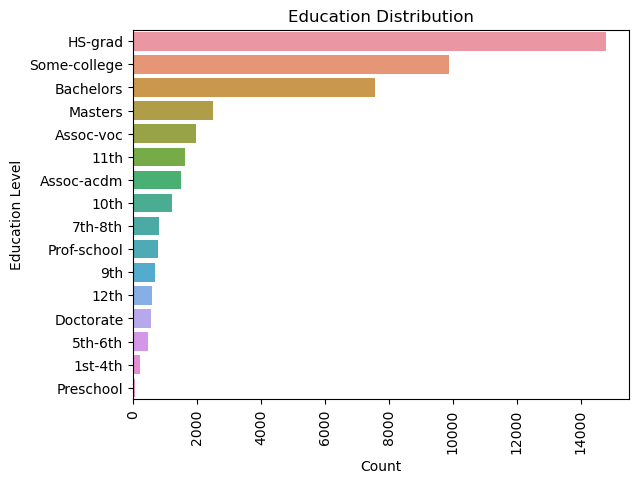

In [23]:
# Visualize Education distribution

sns.countplot(y='education', data=income_df, order=income_df['education'].value_counts().index)

plt.xticks(rotation=90)
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.title('Education Distribution')

plt.show()

### Observations

It looks like most of the respondents are high school graduates, followed by individuals with some college experience, and in third those with Bachelors degrees.

## What level of education contributes to having greater than 50k income?

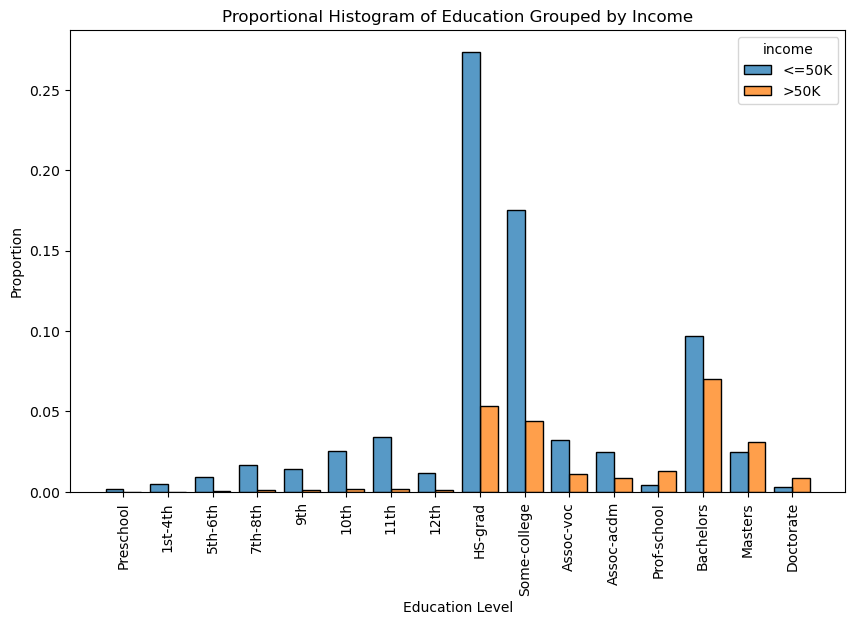

In [24]:
# Plot probability histogram of education grouped by income

plt.figure(figsize=(10,6))

sns.histplot(x='education', data=income_df, stat='proportion', hue='income', multiple='dodge', binwidth=10, shrink=0.8)

plt.xticks(rotation=90)
plt.xlabel('Education Level')
plt.title('Proportional Histogram of Education Grouped by Income')

plt.show()

### Observations

- Very few individuals who have not graduated high school are making more than 50k a year.
- Having a Bachelors degree seems to mark the point where people begin making higher salaries. Graduate degrees like a MAsters and Doctorate then dominate for >50k earners.
- Individuals who have attended professional-school are also more like to have a higher salary.

## What kinds of work class are those with Bachelors, Masters, and Doctorate degrees in?

/tmp/ipykernel_216785/3562929271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  higher_ed_df['education'] = higher_ed_df['education'].astype('string')


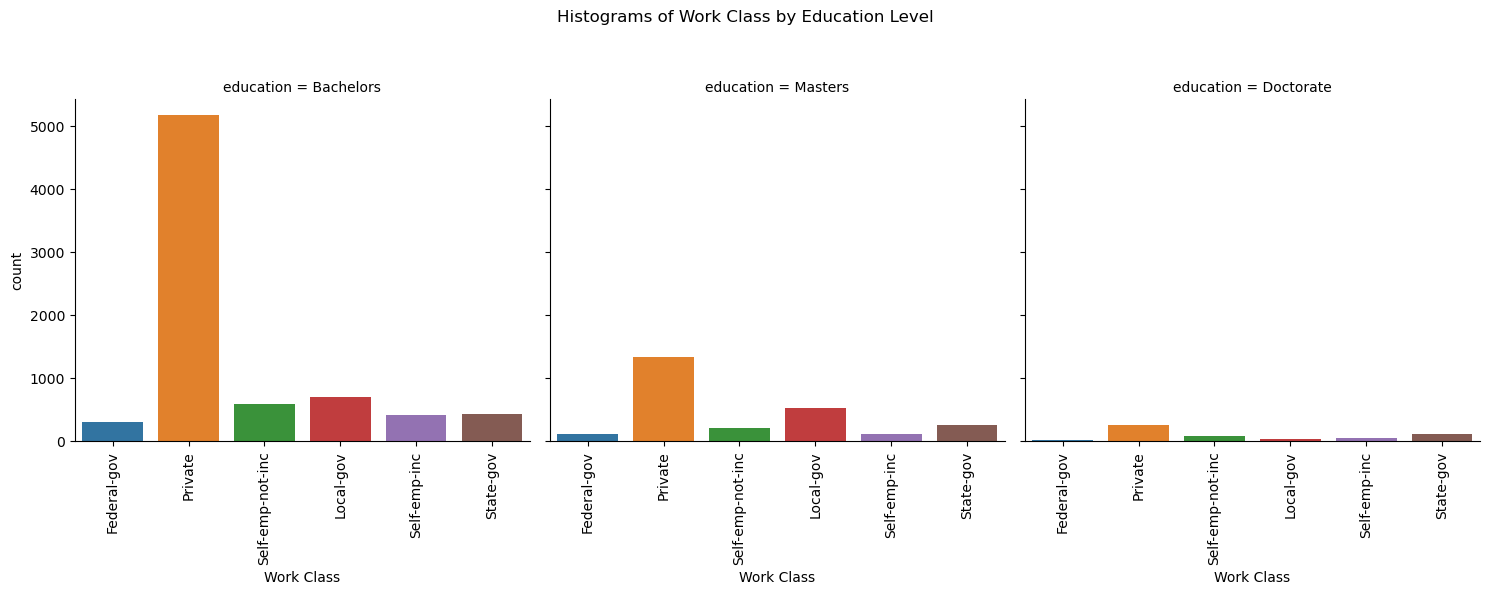

In [45]:
higher_ed = ['Bachelors', 'Masters', 'Doctorate']

higher_ed_df = income_df[income_df['education'].isin(higher_ed)]
higher_ed_df['education'] = higher_ed_df['education'].astype('string')

g = sns.catplot(data=higher_ed_df, x='workclass', kind='count', col='education')

for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel('Work Class')

g.figure.suptitle('Histograms of Work Class by Education Level', )
g.figure.subplots_adjust(top=0.8)

plt.show()

### Observations

- For all three education levels, most individuals are employed in the private sector. In second place for those with Bachelors and Masters degrees, are local government positions, while for individuals with doctorate degrees it's state government work. 
- Individuals with Bachelors are more likely to be self employed than those with graduate degrees.
- Doctors are very unlikely to work for the federal government.

## How are work classes distributed among individuals making more than 50k?

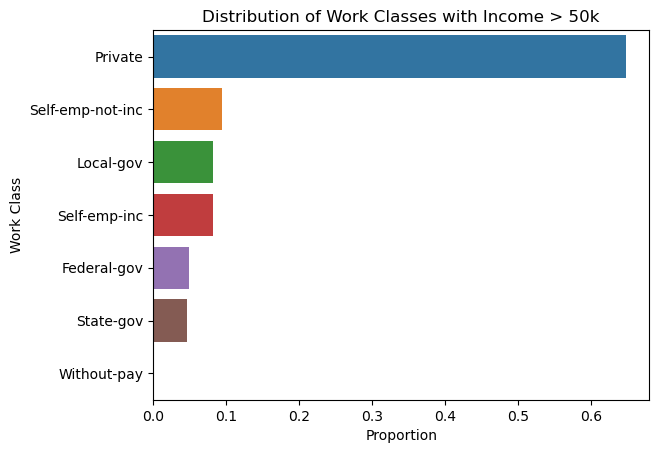

In [65]:
# Visualize which work classes generate >50k income

over_income = income_df[income_df['income'] == '>50K']

workclass_proportions = over_income['workclass'].value_counts(normalize=True)

sns.barplot(y=workclass_proportions.index, x=workclass_proportions.values, orient='h')

plt.ylabel('Work Class')
plt.title('Distribution of Work Classes with Income > 50k')
plt.xlabel('Proportion')

plt.show()

### Observations

- Private industry employees make up a significant portion of individuals making over 50k.
- Surprisingly, self-employed individuals with a non-incorporated business come in second.
- Government employees make up the two smallest groups

## How does age relate to one's education for each work class?

/home/arsen/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


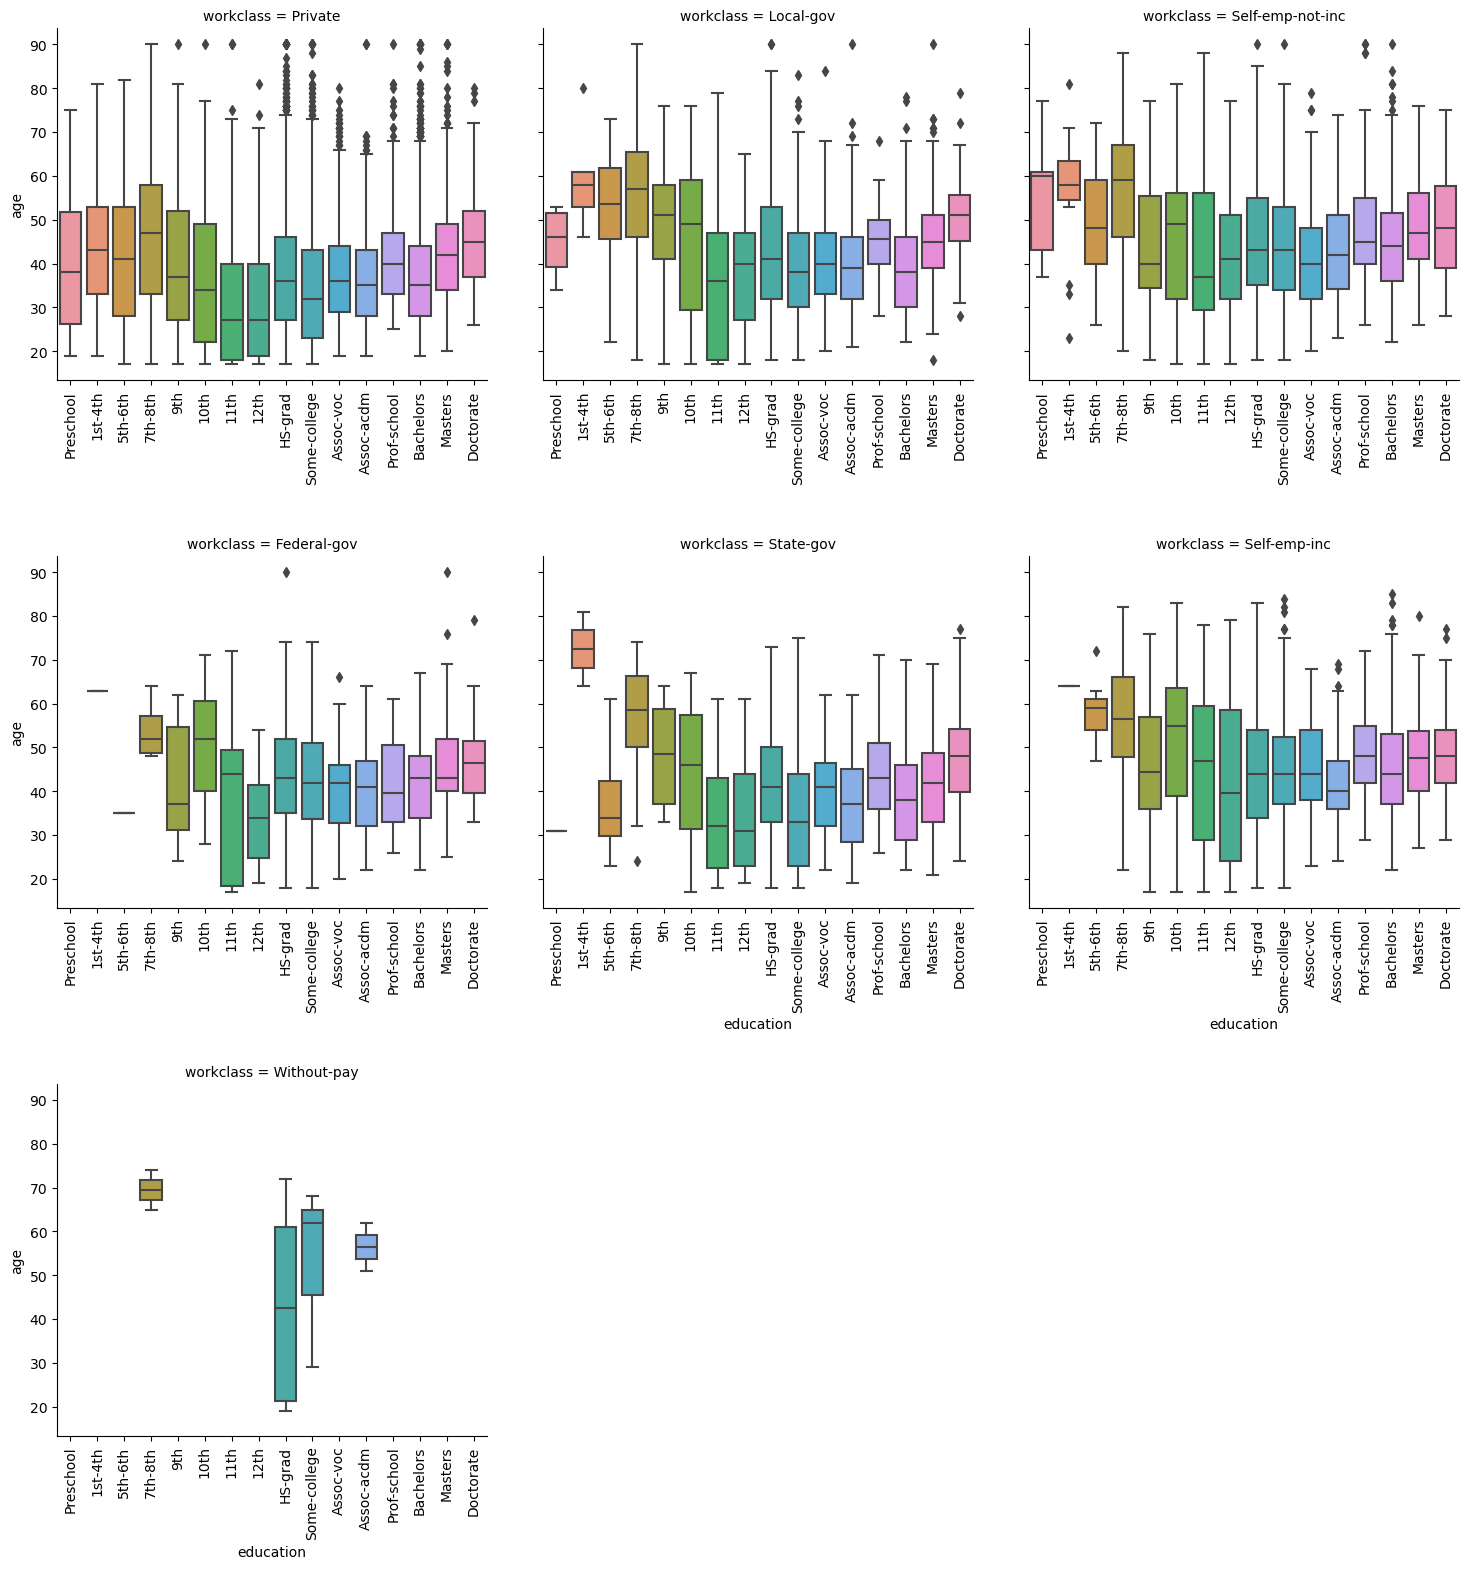

In [25]:
# Plot boxplots of education vs age ordered by employment status

plot = sns.catplot(x='education', y='age', data=income_df, kind='box', col='workclass', col_wrap=3, sharex=False)

for ax in plot.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 

plot.figure.subplots_adjust(hspace=0.5)
plt.show()

### Observations

- Individuals working in the private sector tend to be younger. This is confirmed by the vast quantity of outliers in higher age ranges.
- For self-employed individuals with incorporated businesses, the median age seems to be relatively consistent across education levels. 
- Generally higher education levels have higher median ages. This could be a symptom of longer years of schooling in order to receive those degrees. 
- Government employees show high variability of age.

## How is age distributed among individuals based on income?

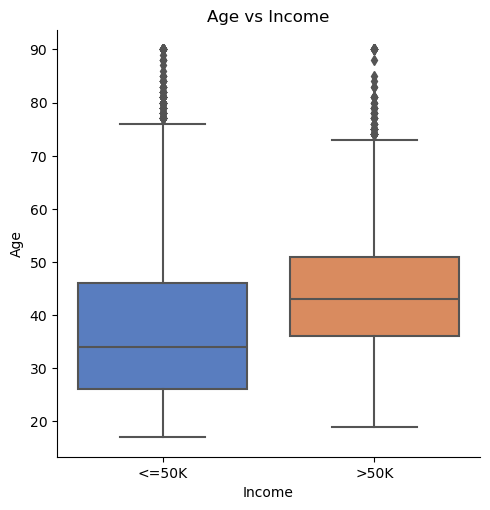

In [49]:
# Investigate distribution of age by income

sns.catplot(x='income', y='age', data=income_df, kind='box', palette='muted')

plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Age vs Income')

plt.show()

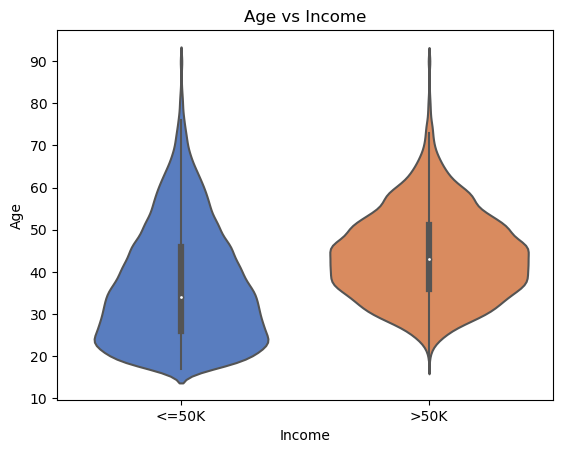

In [48]:
sns.violinplot(data=income_df, x='income', y='age', palette='muted')

plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Age vs Income')
plt.show()

### Observations

As one would expect, individuals who make over 50k are also older than those who make less. The distribution of individuals making less than 50k is also right-distributed, further emphasizing that younger individuals make less.

## Is there a relationship between age and marital status?

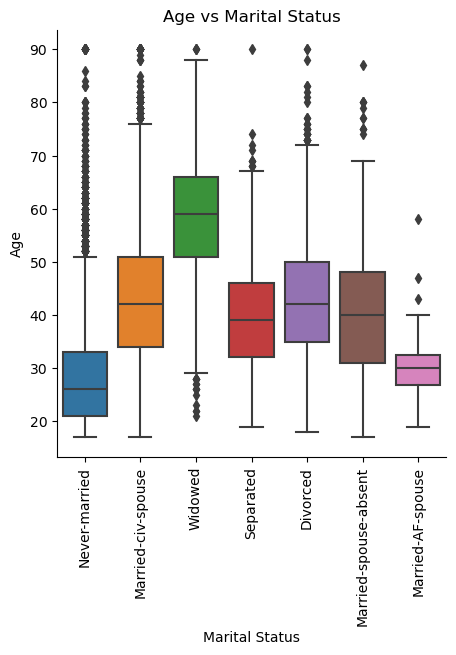

In [27]:
# Visualize age grouped by marital status

sns.catplot(x='marital-status', y='age', data=income_df, kind='box')

plt.xticks(rotation=90)
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.title('Age vs Marital Status')

plt.show()

### Observations

- Widowed individuals tend to be older with a few younger outliers.
- Individuals who were never married are on the younger end, with anyone over 50 considered an outlier.
- Median age of individuals who are separated, divorced, have an absent spouse, or are married to a civilian are similar.

## How does marital status affect income?

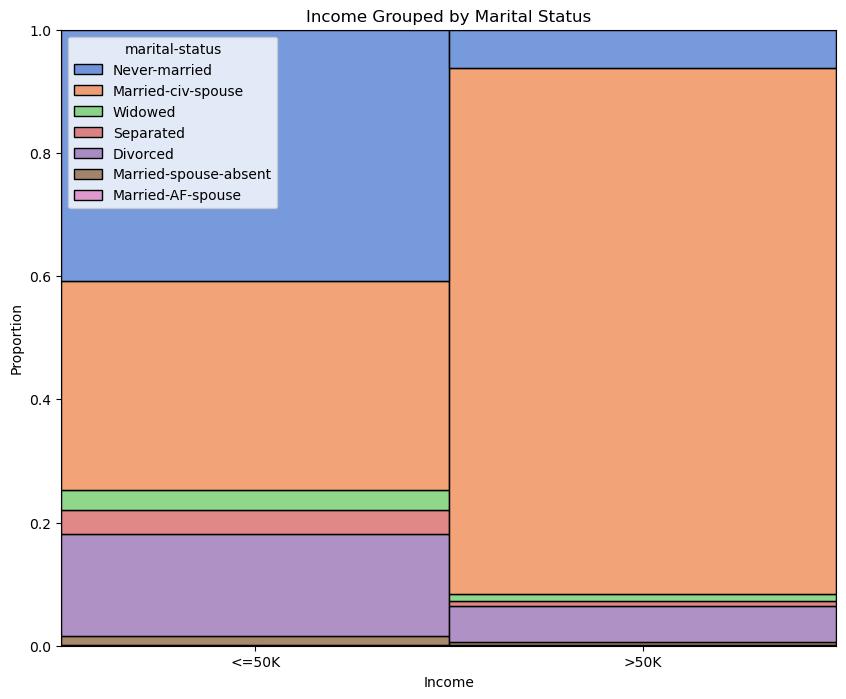

In [64]:
# Plot income colored by marital status

plt.figure(figsize=(10,8))
sns.histplot(data=income_df, x='income', hue='marital-status', multiple='fill', palette='muted')

plt.xlabel('Income')
plt.ylabel('Proportion')
plt.title('Income Grouped by Marital Status')

plt.show()

### Observations

- Married individuals, regardless of whether they are civilian or in the armed forces, make up a predominant chunk of individuals who make more than 50k.
- Individuals who were never married make up a large chunk of those making less than 50k.
- Proportionally more divorced individuals make less than 50k. 

## How does age impact the number of hours worked per week?

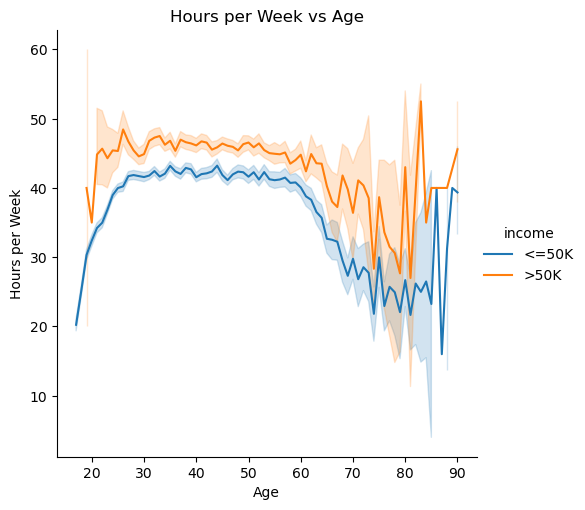

In [28]:
# Visualize hours worked by age and grouped by income

sns.relplot(data=income_df, x='age', y='hours-per-week', hue='income', kind='line')

plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.title('Hours per Week vs Age')

plt.show()

### Observations

- It seems hours worked is pretty consistent at around 40 hours a week. 
- Individuals who make over 50k are consistently working more hours than those making less than 50k.
- Hours worked increases for both groups and peaks around mid-20s, then begins to descending as age passes 60.

## Does work class impact number of hours worked?

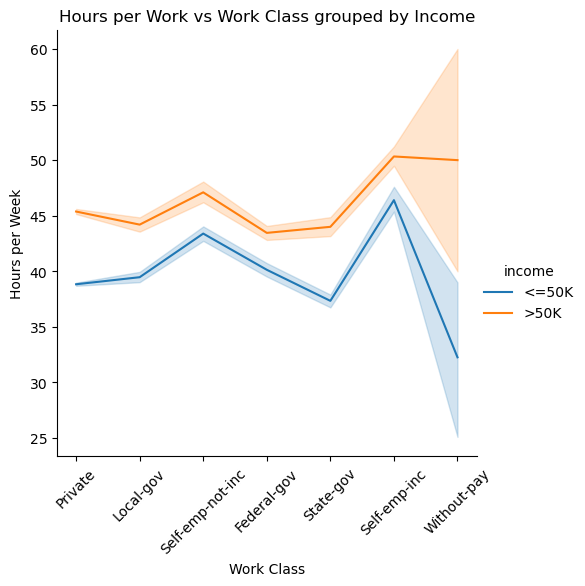

In [66]:
# Generate line plot to show number of hours worked per week for different work classes

sns.relplot(data=income_df, x='workclass', y='hours-per-week', kind='line', hue='income')

plt.xticks(rotation=45)
plt.xlabel('Work Class')
plt.ylabel('Hours per Week')
plt.title('Hours per Work vs Work Class grouped by Income')

plt.show()

# Feature Importance

**What features are able to best predict whether someone makes more than 50k or not?**

## Data Preprocessing

Need to convert all varialbes to numeric types.

In [31]:
income_df.dtypes

age                   int64
workclass            object
fnlwgt                int64
education          category
educational-num       int64
marital-status       object
occupation           object
relationship         object
race                 object
gender               object
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country       object
income               object
dtype: object

In [32]:
# Convert categorical columns except predictor variable to dummy variables

cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

dummy_df = pd.get_dummies(data=income_df[cat_columns])
income_df = pd.concat([income_df, dummy_df], axis=1)
income_df = income_df.drop(cat_columns, axis=1)

income_df.head()


age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
5   34  198693                6             0             0              30   

  income  workclass_Federal-gov  workclass_Local-gov  workclass_Private  ...  \
0  <=50K                      0                    0                  1  ...   
1  <=50K                      0                    0                  1  ...   
2   >50K                      0                    1                  0  ...   
3   >50K                      0                    0                  1  ...   
5  <=50K                      0                    0                  1  ...   

   native-country_Portugal  native-country_Puerto-Rico  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
5                        0                           0   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
0                        0                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   
5                        0                     0                      0   

   native-country_Thailand  native-country_Trinadad&Tobago  \
0                        0                               0   
1                        0                               0   
2                        0                               0   
3                        0                               0   
5                        0                               0   

   native-country_United-States  native-country_Vietnam  \
0                             1                       0   
1                             1                       0   
2                             1                       0   
3                             1                       0   
5                             1                       0   

   native-country_Yugoslavia  
0                          0  
1                          0  
2                          0  
3                          0  
5                          0  

[5 rows x 105 columns]

In [33]:
# Convert predictor variable to dummy

dummy_df = pd.get_dummies(data=income_df['income'], drop_first=True)
income_df = pd.concat([income_df, dummy_df], axis=1).drop('income', axis=1)

income_df.head()

age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
5   34  198693                6             0             0              30   

   workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0                      0                    0                  1   
1                      0                    0                  1   
2                      0                    1                  0   
3                      0                    0                  1   
5                      0                    0                  1   

   workclass_Self-emp-inc  ...  native-country_Puerto-Rico  \
0                       0  ...                           0   
1                       0  ...                           0   
2                       0  ...                           0   
3                       0  ...                           0   
5                       0  ...                           0   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
0                        0                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   
5                        0                     0                      0   

   native-country_Thailand  native-country_Trinadad&Tobago  \
0                        0                               0   
1                        0                               0   
2                        0                               0   
3                        0                               0   
5                        0                               0   

   native-country_United-States  native-country_Vietnam  \
0                             1                       0   
1                             1                       0   
2                             1                       0   
3                             1                       0   
5                             1                       0   

   native-country_Yugoslavia  >50K  
0                          0     0  
1                          0     0  
2                          0     1  
3                          0     1  
5                          0     0  

[5 rows x 105 columns]

## Model

In [34]:
# Set up feature and predictor sets

X = income_df.drop(['>50K', 'fnlwgt'], axis=1)
y = income_df['>50K']

# Split into training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Set up CV

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Set up hyperparameter tuning

param_grid = {
    'n_estimators' : np.arange(200,1000),
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : np.arange(5,100),
    'min_samples_split' : np.arange(2,10),
    'min_samples_leaf' : np.arange(2,10),
    'min_impurity_decrease' : np.linspace(0, 0.1, 10)
}

# Initialize model

model = RandomForestClassifier()

cv = RandomizedSearchCV(model, param_grid, cv=kf, n_jobs=-1)
cv.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57,...
       902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914,
       915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927,
       928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940,
       941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953,
       954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966,
       967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979,
       980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992,
       993, 994, 995, 996, 997, 998, 999])})

In [35]:
y_pred = cv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     10241
           1       0.78      0.62      0.69      3326

    accuracy                           0.86     13567
   macro avg       0.83      0.78      0.80     13567
weighted avg       0.86      0.86      0.86     13567



In [38]:
feature_importances = cv.best_estimator_.feature_importances_

importance_df = pd.DataFrame({'Feature':X.columns, 'Importance':feature_importances})
importance_df.sort_values(by='Importance', ascending=False)

importance_df.head(10)

Feature  Importance
0                         age    0.067678
1             educational-num    0.109847
2                capital-gain    0.156730
3                capital-loss    0.036353
4              hours-per-week    0.052797
5       workclass_Federal-gov    0.003465
6         workclass_Local-gov    0.002062
7           workclass_Private    0.004790
8      workclass_Self-emp-inc    0.003619
9  workclass_Self-emp-not-inc    0.005250

## Conclusion

According to the model, the most important features in order include:
1. Age
2. Education
3. Capital gain
4. Capital loss
5. Hours worked per week

# Conclusion

This survey, conducted in 1994, had nearly 50,000 respondents. They were asked demographic questions, such as their race, gender, and country of origin, as well as questions about their financial status. Although this dataset is quite imbalanced, it does allow us to draw certain conclusions pertaining to characteristics of individuals making greater than 50k. 

A few obvious characteristics immediately stood out upon deeper investigation. One is the number of hours worked when comparing people who make less than 50k to people who make more. Regardless of age, those making more consistently worked longer hours per week. This followed a natural progression where it grew as individuals reached their mid-20s, and diminished as they reached retiring age. This strong relationship is confirmed by the application of a Random Forest model, which ranked hours worked as the 5th most important feature able to predict someone's salary.

The second characteristic was their age, which was higher for those making more money. This can of course be attributed to them gaining more experience in their field, earning promotions in a company they've worked at for a long time, or having been able to acquire higher forms of education. In fact, when looking at the relationship between age and education, it was found median age of individuals increased as level of education increased. Similarly, an individual's highest level of education correlated with their salary, implying that someone is more likely to get a higher paying job if they have a higher form of education. According to our Random Forest model, age was the most relevant feature when predicting someone's salary followed by their education level.

Thirdly, marital status correlated strongly with income. When investigating the marital statuses of individuals making greater than 50k, those who were currently married significantly dominated. On the other hand, individuals making less than 50k were more likely to never have been married or divorced. 

Not all industries and work classes pay similarly. Someone is much more likely to make greater than 50k while working in the private industry than for the government, for example. Surprisingly, the second most frequent work class found among highly-paid individuals was self-employed without an incorporated business. Unsurprisingly they, along with self-employed individuals with incorporated businesses, work more hours than the other classes. This make sense, since self-employed individuals not only need to produce the good or service they are providing, but are in charge of their own advertising and what not. Work classes were also rated high in terms of feature importance by our Random Forests model.